In [ ]:
import numpy as np

def majority_heads_biased(n, p=0.51):
  success=0
  for i in range(n):
    if np.random.random()>1-p:
      success+=1
  return success>500

print(majority_heads_biased(1000))

True


In [ ]:
from scipy.stats import binom, norm
import math

def majority_heads_binom(n, p=0.51):
  majority = math.ceil(n/2)
  return sum(binom.pmf(k,n,p) for k in range(majority, n+1))

print(majority_heads_binom(1000))

0.7467502275563255


In [ ]:
binom.pmf(501,1000,0.51)

0.021451693818829193

In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

voting_clf=VotingClassifier(
    estimators= [
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42, probability=True))])

voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.912

In [ ]:
voting_clf.estimators_

[LogisticRegression(random_state=42),
 RandomForestClassifier(random_state=42),
 SVC(probability=True, random_state=42)]

In [ ]:
voting_clf.named_estimators_

{'lr': LogisticRegression(random_state=42),
 'rf': RandomForestClassifier(random_state=42),
 'svc': SVC(probability=True, random_state=42)}

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
  print(name, clf.score(X_test,y_test))

lr 0.864
rf 0.896
svc 0.896


In [ ]:
voting_clf.voting = 'soft'
voting_clf.score(X_test,y_test)

0.92

# Bagging and Pasting

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [ ]:
bag_clf.score(X_test,y_test)

0.912

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf1 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1)

bag_clf1.fit(X_train,y_train)
# Pasting, eyni data istifade olunmur

BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_samples=100, n_estimators=500, n_jobs=-1)

In [ ]:
bag_clf1.score(X_test,y_test)

0.912

# OOB evaluation

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,  bootstrap=True, n_jobs=-1, oob_score=True)

bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.8933333333333333

# RandomForest

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
rnd_clf.score(X_test, y_test)

0.912

In [ ]:
bag_clf= BaggingClassifier(DecisionTreeClassifier(max_features='sqrt', max_leaf_nodes=16),
                           n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.92

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier(n_estimators = 500,
                               n_jobs = -1,max_leaf_nodes = 16)

ext_clf.fit(X_train,y_train)
ext_clf.score(X_test,y_test)

0.912

In [ ]:
# sutunlarin onemiyyetlilik derecesi
from sklearn.datasets import load_iris

iris = load_iris(as_frame = True)
rnd_clf = RandomForestClassifier(n_estimators = 500,random_state = 42)
rnd_clf.fit(iris.data, iris.target)
for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
    print(round(score, 2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


# ADA Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators = 200,
                             learning_rate = 0.5)

ada_clf.fit(X_train,y_train)
ada_clf.score(X_test,y_test)

0.896

# Gradient Boosting

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100,1)-0.5
y = 3*X[:,0]**2 + 0.05 * np.random.randn(100)

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X,y)
# her sonraki model evvelkinin sehvnini duzeltmeye calisir

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
y2 = tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X,y)
gbrt.score(X,y)

0.955878787845742

In [ ]:

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=300, learning_rate=1.0, n_iter_no_change=10, random_state=42)
gbrt_best.fit(X,y)
gbrt_best.score(X,y)

0.9989413750275369

In [ ]:
gbrt_best.n_estimators_

28

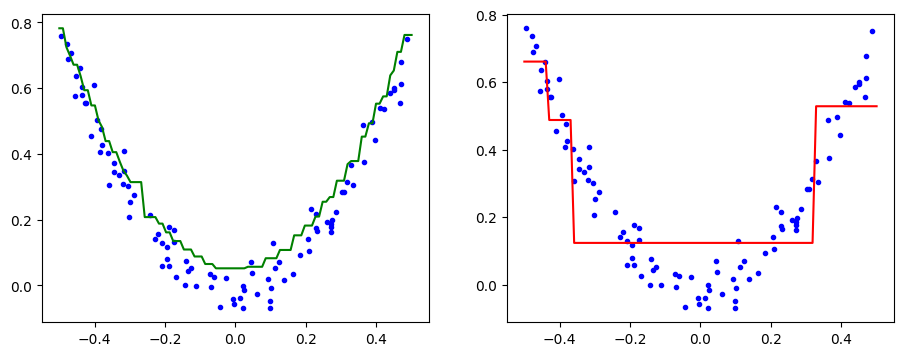

In [ ]:
import matplotlib.pyplot as plt
X_new = np.linspace(-0.5, 0.5, 100).reshape(-1, 1)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(X,y,'b.')
plt.plot(X_new, gbrt_best.predict(X_new),'g-', label='boosted')

plt.subplot(122)
plt.plot(X,y,'b.')
plt.plot(X_new, tree_reg1.predict(X_new), 'r-', label='Tree 1');

# ExtraGradientBoosting

In [ ]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X,y)
xgb_reg.score(X,y)

0.9999649164896526

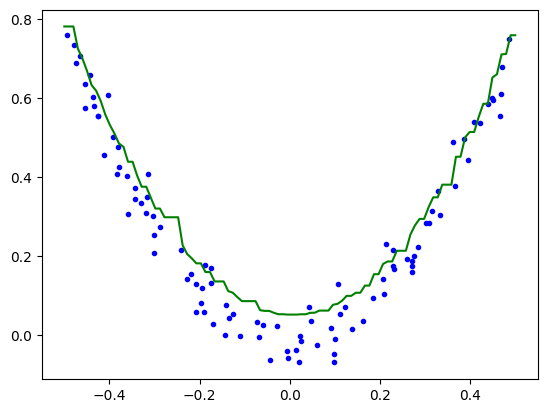

In [ ]:
plt.plot(X,y, 'b.')
plt.plot(X_new, xgb_reg.predict(X_new), 'g-', label = 'Boosted')

# Categorical Boosting

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor, Pool

catboost = CatBoostRegressor(iterations=20, learning_rate=1, depth=2)
catboost.fit(X,y)
catboost.score(X,y)

0:	learn: 0.1400712	total: 46.3ms	remaining: 879ms
1:	learn: 0.1029267	total: 47.2ms	remaining: 425ms
2:	learn: 0.0901760	total: 47.6ms	remaining: 270ms
3:	learn: 0.0744081	total: 48ms	remaining: 192ms
4:	learn: 0.0715869	total: 48.3ms	remaining: 145ms
5:	learn: 0.0633344	total: 48.9ms	remaining: 114ms
6:	learn: 0.0548890	total: 49.3ms	remaining: 91.5ms
7:	learn: 0.0510455	total: 49.6ms	remaining: 74.5ms
8:	learn: 0.0455010	total: 50ms	remaining: 61.1ms
9:	learn: 0.0421109	total: 50.4ms	remaining: 50.4ms
10:	learn: 0.0383510	total: 50.7ms	remaining: 41.5ms
11:	learn: 0.0362642	total: 51.1ms	remaining: 34.1ms
12:	learn: 0.0340481	total: 51.5ms	remaining: 27.7ms
13:	learn: 0.0313456	total: 52ms	remaining: 22.3ms
14:	learn: 0.0295901	total: 52.4ms	remaining: 17.5ms
15:	learn: 0.0280865	total: 52.7ms	remaining: 13.2ms
16:	learn: 0.0277597	total: 53.1ms	remaining: 9.37ms
17:	learn: 0.0263899	total: 53.5ms	remaining: 5.94ms
18:	learn: 0.0261165	total: 53.9ms	remaining: 2.83ms
19:	learn: 0.02

0.9872013372566464

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(max_depth=5, random_state=42)
lgbm.fit(X,y)
lgbm.score(X,y)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 35
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 1
[LightGBM] [Info] Start training from score 0.265458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.8285984586781898

# Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

stack_clf = StackingClassifier(estimators = [
    ('lr', LogisticRegression(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42, probability=True))
],
                               final_estimator = RandomForestClassifier(random_state=43)
)

stack_clf.fit(X_train,y_train)
stack_clf.score(X_test, y_test)

0.928